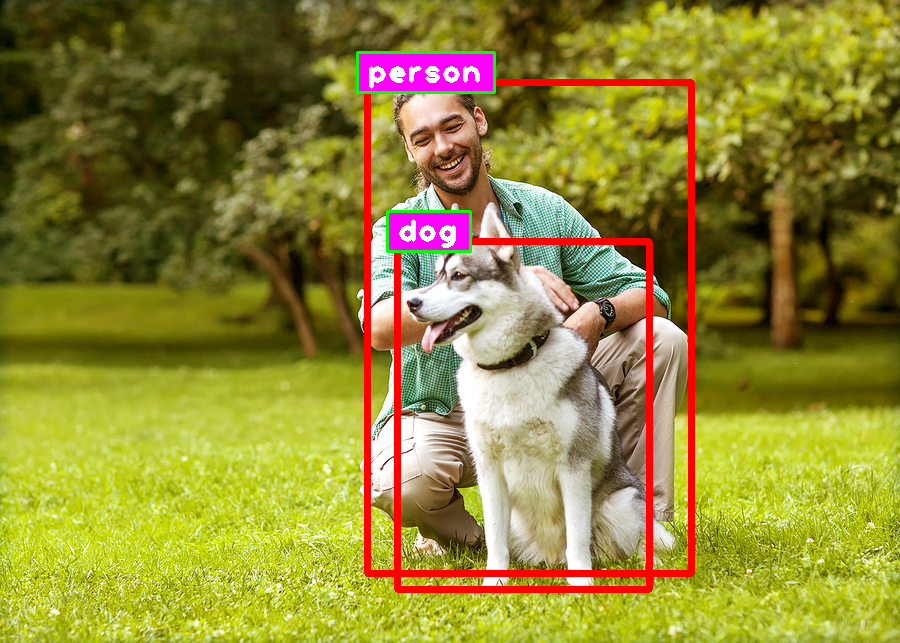

In [86]:
import torch
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from torchvision import transforms as T
import cvzone

# Load SSD model
from torchvision.models.detection import ssd300_vgg16
SSD_model = ssd300_vgg16(pretrained=True, progress=False)
SSD_model.eval()

# Load image
image = cv2.imread('mand and dog.jpg')
img=image.copy()
img_transform=T.ToTensor()
image=img_transform(image)

classnames=[]
with open('labels.txt','r') as f:
    classnames=f.read().splitlines()



# Run inference
with torch.no_grad():
    y_pred=SSD_model([image])

    bbox,scores,labels=y_pred[0]['boxes'],y_pred[0]['scores'],y_pred[0]['labels']

    nums=torch.argwhere(scores > 0.80).shape[0]
    for i in range(nums):
    x,y,w,h=bbox[i].numpy().astype('int')
    cv2.rectangle(img,(x,y),(w,h),(0,0,255),5)
    labelname=labels[i].numpy().astype('int')
    labeldetected=classnames[labelname-1]
    cvzone.putTextRect(img,labeldetected,[x,y],scale=2,border=2)


cv2_imshow(img)